In [5]:
%matplotlib inline

In [123]:
from playground import data, normalisation
from functools import reduce
from operator import and_

In [24]:
import numpy as np
np.set_printoptions(linewidth=170)

In [176]:
from skimage import morphology, data, util, measure, transform

In [3]:
train_X, train_y, test_X, test_y = data.mnist()

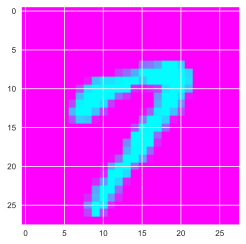

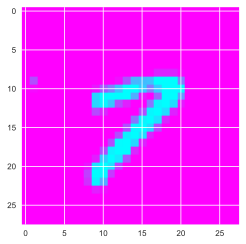

In [26]:
count = 1
for y, x in zip(train_y, train_X):
    if y == 7:
        seven = x
        count += 1
        plt.imshow(x, cmap='cool_r')
        plt.show()
    if count > 2:
        break

In [186]:
new_seven = seven.copy()
mask = (new_seven > 0)
min_size = int(round(mask.sum() / 10))
final_mask = morphology.remove_small_objects(mask, min_size=min_size)
new_seven[~final_mask] = 0

props = measure.regionprops(final_mask.astype(np.uint0))[0]
cropped = new_seven[props.bbox[0]:props.bbox[2], props.bbox[1]:props.bbox[3]]

resized = transform.resize(cropped, (28, 28))

C:\Python\3.6\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


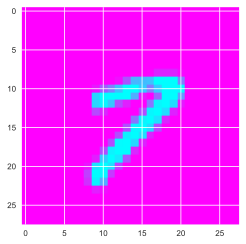

In [163]:
plt.imshow(new_seven, cmap='cool_r')
plt.show()

In [174]:
props.bbox

(8, 8, 24, 21)

In [175]:
props.moments

array([[  1.00000000e+02,   5.95000000e+02,   5.31700000e+03,   5.63770000e+04],
       [  5.82000000e+02,   2.62800000e+03,   1.87080000e+04,   1.64130000e+05],
       [  4.54800000e+03,   1.72860000e+04,   1.04898000e+05,   7.91376000e+05],
       [  4.04640000e+04,   1.36026000e+05,   7.30662000e+05,   4.87219200e+06]])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   3,  37,  37,  37,   7],
       [  0,   0,   0,   0,  14,  84, 182, 188, 193, 254, 254, 254, 124],
       [  0,  22,  91, 130, 193, 254, 254, 204, 125, 201, 254, 254, 246],
       [  0, 214, 254, 255, 254, 255, 173,  22,   0,  98, 254, 255, 152],
       [  0, 213, 245, 198,  75,  31,   2,   0, 117, 245, 254, 221,  25],
       [  0,  72,  36,   0,   0,   0,   0,  78, 246, 254, 222,  33,   0],
       [  0,   0,   0,   0,   0,   0, 117, 243, 254, 225,  37,   0,   0],
       [  0,   0,   0,   0,   0,  77, 249, 254, 220,  73,   0,   0,   0],
       [  0,   0,   0,   0,  75, 242, 254, 224,  37,   0,   0,   0,   0],
       [  0,   0,   0,  75, 251, 254, 219,  33,   0,   0,   0,   0,   0],
       [  0,   0,  77, 242, 254, 254,  40,   0,   0,   0,   0,   0,   0],
       [  0,  29, 209, 254, 232,  83,   1,   0,   0,   0,   0,   0,   0],
       [ 20, 226, 254, 224,  63,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 63, 254, 250,  58,   0,   0, 